# Бандиты в ДЦ

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import random

In [33]:
def Q(p):
    if p<1000:
        return 0.5*np.exp(-p*0.001)
    elif p<1300:
        return 0.16
    elif p<1700:
        return 0.14
    elif p<2000:
        return 0.13
    elif p<2500:
        return -p*0.0001+0.33
    elif p<3000:
        return -p*0.00005+0.18
    else:
        return 0
    
def R(p,c=900):
    return Q(p)*(p-c)*truncnorm.rvs(a=0.2,b=2,loc=1,scale=0.2)

In [34]:
y1=[]
x = np.linspace(850, 3050, 500)
for i in x:
    y1.append(R(i))

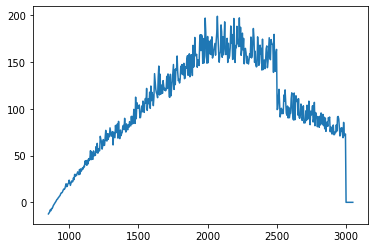

In [35]:
fig = plt.figure()
plt.plot(x, y1)

In [36]:
bins = [1000,1100,1200, 1300, 1400, 1500, 1600,1800,2000, 2200,2500,2800] #ручки

In [37]:
def R1(a,b,p):
    return (a*p+b)*(p-900)

def R2(a,b,p):
    return a*np.exp(-p*b)*(p-900)

In [38]:
def argmax_R1(a,b):
    return -(b-900*a)/(2*a)

def argmax_R2(a,b):
    return 1/b+900

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
def get_optimal_params_R1(x,y):
    y1 = np.array(y)
    x1 = np.array(x)
    y1 = y1/(x1-900)
    reg = LinearRegression().fit(x1.reshape(-1, 1), y1)
    return reg.coef_[0], reg.intercept_

In [41]:
def get_optimal_params_R2(x,y):
    y1 = np.array(y)
    x1 = np.array(x)
    y1 = y1/(x1-900)

    y_log = np.log(y1)
    reg = LinearRegression().fit(x1.reshape(-1, 1), y_log)
    return np.exp(reg.intercept_), -reg.coef_[0]

In [42]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)

2200 173.54555724896093
1800 149.40827588655884
1400 73.43983263978826
2500 99.48390799855089


## Eps-Greedy

In [43]:
def nearest(lst, target):
    return min(lst, key=lambda x: abs(x-target))

In [45]:
# eps-Greedy R1
eps = 0.2 # 20% 
N=200 #1000 итераций
for i in range(0,N):
    if np.random.rand()<eps:
        x0=random.choice(bins)
        x.append(x0)
        y0=R(x0)
        y.append(y0)
        print("!",x0,y0)
    else:
        a,b=get_optimal_params_R1(x,y)
        x0 = argmax_R1(a,b)
        x0 = nearest(bins,x0)
        x.append(x0)
        y0=R(x0)
        y.append(y0)
        print(x0,y0)

2200 149.5956788337192
2200 165.82200031833418
2200 166.15811246232437
2200 170.39927798497786
! 1500 103.99913942175883
2200 152.00149729678017
! 2200 154.60625651313507
2200 152.99526494760963
2200 170.70580459566742
2200 149.4696358144762
2200 169.80087519463072
2200 155.0194392362017
2200 159.85695699254973
2200 180.0309444594238
2200 156.35888705070118
2200 165.83831523022624
2200 162.91939226824718
2200 168.8837369019891
2500 116.3973286886717
2200 160.27780800380276
2200 174.71313234016316
! 1200 50.02703310310979
2500 97.81615685607527
2500 96.10471670313117
2200 184.7435357239605
2200 167.19280758248473
2200 169.39643613076186
! 1100 36.43222046667944
2500 99.7530393326001
2200 168.24744700733933
2200 155.63713471004573
2200 151.93418554037152
! 2800 97.88837513240517
! 1000 19.212539262382048
2200 167.72643016590996
2200 172.39467153032683
2500 99.93883256125554
2200 161.70656501689052
2200 152.16952436390244
2200 151.47794132382356
2200 175.07365879359836
2200 153.2828171801

In [49]:
# eps-Greedy R1
eps = 0.2 # 20% 
N=1000 #1000 итераций
y_dict = {}
for i in range(0,N):
    if ((np.random.rand()<eps) or (i<3)):
        x0=random.choice(bins)
        y0=R(x0)
        print("!",x0,y0)
    else:
        x0 = max(y_dict, key=y_dict.get)
        y0=R(x0)
        y.append(y0)
        print(x0,y0)
    y_dict[x0] = y0

! 1800 145.89365711635804
! 1300 72.521952736002
! 1000 19.166622034374065
! 1300 73.88853439231833
1800 157.09482071262997
1800 124.31812926909723
1800 132.18224711002185
1800 122.47728488710587
1800 153.77487690416575
1800 144.6861125235804
1800 124.95788239295027
! 2800 93.01556219301432
1800 148.99067797074943
1800 127.43937589687525
1800 126.82700216219483
1800 125.37127958065066
1800 130.02051145251178
! 1300 62.563010146429555
! 2500 99.30095097753558
1800 144.74762742277812
1800 129.75653007511517
! 2200 172.02511066969953
! 1200 51.25604094456304
2200 165.34228795691254
2200 164.68854117649292
2200 169.3274122780155
! 2000 156.47299648531066
2200 166.95637631773525
2200 163.008627463222
2200 161.37586241891964
2200 156.45200516800838
2000 154.08032998685192
! 1800 126.33065295541823
2200 189.10889992984187
! 1200 52.4913690585534
2200 166.55941492394453
2200 164.97335299149847
2200 178.78880856691484
2200 161.69236193150454
! 1500 100.43414182541335
2200 167.28337974470608
220

! 1000 20.369309330359265
2200 183.9773171737768
2200 157.16811653188782
2200 159.857207340863
2200 150.15539739049098
2200 164.43351918588866
2200 162.11237080842653
2200 159.90622382124064
2200 187.43464074947394
2200 176.08728613341884
2200 172.32652041255722
2200 154.3070006986285
2200 180.46915965635503
! 2200 149.7282788721133
2200 182.35787967002085
2200 158.032508634785
2200 161.64371255967495
2200 161.15126571388026
2200 173.36432847423512
2200 183.18634131165078
2200 156.18338598093496
2200 184.18954885799582
2200 173.24120929073638
! 1600 106.10257575050919
2200 163.38668161651975
2200 184.1691876065107
2200 148.95414459397253
2200 154.47711262109306
2200 184.54415161516775
! 2800 85.88271513715698
2200 150.8888261586061
2200 150.11308384498068
2200 154.59394822172538
2200 153.91339108844616
2200 166.25705635017485
2200 154.8155486694375
2200 165.11870792691
2200 170.32464459127215
2200 169.08401729391971
! 1800 141.61888210049315
2200 191.249438715616
2200 154.4001996416973

2200 166.49460005553576
2200 181.45104598272223
2200 179.71997725832696
2200 178.79367287029473
2200 154.36231907855492
! 1600 104.58326846504191
2200 162.95077826937847
2200 155.01237369049144
2200 165.64786162024268
2200 174.62108382819977
2200 171.21011670960834
2200 184.2525532695673
! 1600 108.32959420787718
2200 185.5633022802834
2200 148.9696531962963
! 2500 107.90833377755689
2000 160.72967704891056
2000 169.50158013734196
2000 168.52420215043793
2000 175.08532469535692
! 1200 60.65788462453739
2000 149.70636294183038
! 2500 91.56981334265649
2000 162.0603824076024
2000 155.2496543757468
2000 153.99125930677712
2000 189.3182446383648
2000 154.3370448901404
2000 150.63494743685212
2000 174.97693856139423
2000 169.9671158494035
! 2800 90.09060725122703
! 1300 59.03746052513111
2000 184.88479504524477
2000 168.67034261438891
2000 158.70107610946235
2000 167.02248457602997
2000 163.00446904823954
2000 181.46980422538707
2000 150.37770899139116
2000 161.93238775521064
2000 160.66865

In [47]:
y_dict

{1400: [173.54555724896093,
  149.40827588655884,
  73.43983263978826,
  99.48390799855089,
  169.1481089933144,
  93.14665354043535,
  99.71042229535543,
  175.0674129574046,
  188.85477321925435,
  133.58882675673527,
  170.60383858441153,
  151.56325448712698,
  181.07933022863028,
  169.35539492665276,
  151.02896821620374,
  37.54810584525088,
  157.61093947383884,
  152.74277102373284,
  185.8598078575636,
  185.33561687707018,
  174.2923177904349,
  174.0004093936782,
  188.4038898671258,
  158.51152106598653,
  188.5447502339091,
  164.40320048034965,
  189.2245136924016,
  154.21991224881717,
  155.415119798843,
  165.11783206874176,
  162.00975946639008,
  157.61132511518753,
  150.0029437822066,
  149.49926046671442,
  187.6585806760613,
  175.46344434742892,
  183.33580806981516,
  196.72733552113874,
  103.08656871225975,
  197.65326346975905,
  100.08156859278806,
  192.0848654245833,
  100.70674390080579,
  159.1805095389487,
  158.33161757874575,
  158.66833042410872,
 

In [240]:
x_1 = x
y_1 = y

In [243]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)

1000 19.353316761466925
2800 82.78848140247314
1800 127.4635623757696
1500 105.11979286096958


In [244]:
# eps-Greedy R2
eps = 0.2 # 20% 
N=1000 #1000 итераций
for i in range(0,N):
    if np.random.rand()<eps:
        x0=random.choice(bins)
        x.append(x0)
        y0=R(x0)
        y.append(y0)
        print("!",x0,y0)
    else:
        a,b=get_optimal_params_R2(x,y)
        x0 = argmax_R2(a,b)
        x0 = nearest(bins,x0)
        x.append(x0)
        y0=R(x0)
        y.append(y0)
        print(x0,y0)

2000 178.23167760797782
2200 152.8649126718899
2200 169.79929521750938
2200 173.5695307952947
2200 160.91404653534264
2200 183.24120990102318
2500 102.62502284933502
2200 177.4833799813503
! 1200 63.20728418852751
2200 179.40961104063427
2200 179.28104276272492
2500 91.61436139222232
2200 164.96382462990925
2200 151.8249763698702
2200 183.15261232718177
! 2500 102.60966343532957
2200 167.6842692367916
2200 190.43423627551235
2200 156.46955014832835
2200 182.06506539601378
2200 167.85917966889733
2200 153.55349744681826
2200 149.3544670319059
2200 165.56540889370686
! 1800 141.40366989072183
2200 182.83298543015195
2200 154.02778212448106
2200 175.3998219154165
! 2000 156.9772162789393
! 2200 181.89717077889688
! 1100 35.44446373277019
2500 95.87027356281943
! 1200 52.14489546650906
2500 110.40176616380953
2500 92.68830587513352
! 1400 73.42250326944546
! 1800 145.4657396572417
2500 93.22177839650595
2200 164.77467050397408
2200 196.38962242263295
2200 188.357514509166
2200 163.67688951

2200 163.4537196526913
! 1100 37.70160293788613
2500 103.00867918219976
2500 93.33236507553657
2200 150.75979208066948
! 2800 89.96635842390513
! 1100 40.91630931640292
2200 169.63162263756664
2200 171.1395631839839
2200 191.6957950882516
2200 155.97141135052922
! 2800 97.73301381083891
2200 197.72381429812617
2200 157.95203456911844
2200 165.11931671317265
2200 181.6755418578358
2200 184.17631573337363
! 1600 109.04615890189493
2200 160.65618674395805
2200 150.49907580627718
! 2500 105.56440733528815
2200 176.01368860870775
2200 164.72768548355887
2200 153.25793001073706
2200 167.91636361634642
2200 171.69987266229697
2200 177.8657346629182
2200 174.77645431174034
! 1200 50.6051917255948
2200 149.51099141281196
2200 149.08361978376388
! 1200 53.49549718714033
2500 95.8000720239764
! 2800 103.6722339539038
! 1800 123.04995796079565
2200 155.7207398002599
! 1000 18.40076448926082
2500 117.96250098858894
2500 113.99367032067882
2200 174.60833888641613
! 1800 160.99230590967917
2200 159.3

! 1300 61.16772123305018
2500 92.23132152862405
! 2200 180.166860277621
! 1400 90.68207235153122
! 1200 50.02111446640744
2500 110.96135346248597
2500 117.79263914550233
2500 93.56094629070577
2500 99.36758434063086
2200 165.7568049274071
2200 160.55644410122534
2200 177.66709435765674
2200 162.68293736852564
2200 153.9023797847343
2200 188.07336070216584
! 1100 33.32266318693421
2500 95.04429429166215
2500 94.69364957339157
! 1600 126.95591287405446
! 2000 158.58623131257067
2200 159.62135961162852
2200 172.57203691749808
! 1000 17.17751001987952
2500 97.30131560289632
2500 115.16408145514032
2500 92.93890042588694
2500 102.43144099381998
2200 174.14438223319212
2200 168.89603426010362
2200 190.05145510594656
2200 164.8473049707392
2200 158.5116956938607
2200 177.131827000808
2200 197.3028791575158
2200 152.3673637793544
! 1200 51.03563280477461
2500 109.7707992076758
2500 102.61047008485815
! 1100 36.04835916345687
! 1100 41.14995076725646
2500 103.11878496324302
2500 99.733825589726

In [ ]:
x_2 = x
y_2 = y

## UCB

In [50]:
from collections import Counter

In [51]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)

1800 139.2715139677207
1800 128.01038765117633
1000 21.575594804092376
2500 99.35720858365795


In [52]:
N=50 #1000 итераций
for i in range(0,N):
    a,b=get_optimal_params_R1(x,y)
    nkk = dict(Counter(x))
    bins_values = []
    for k in bins:
        n_k = nkk.get(k,0.1)
        UCB = R1(a,b,k) + np.sqrt(2*np.log(i+n)/n_k)
        bins_values.append(UCB)
    argmax_k=bins[np.argmax(bins_values)] #np.argmax(bins_values)
    print(i,np.max(bins_values),argmax_k,bins_values)
    x0=argmax_k
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    #print(x0,y0)

0 138.15256854857313 2000 [23.924473652425085, 47.74852150335858, 65.93639582881003, 82.08852510193235, 96.20490932272554, 108.28554849118962, 118.33044260732457, 128.22486800965427, 138.15256854857313, 135.84916120522266, 113.52553382457566, 80.0810579192723]
1 145.63202731021423 2200 [24.258846290964726, 48.65318047257162, 67.21834278281408, 83.83372439169246, 98.49932529920677, 111.21514550535697, 121.98118501014312, 133.25904440880822, 141.6681448456465, 145.63202731021423, 127.25601782183436, 99.09076436117851]
2 151.11714662198384 2200 [24.21066893838373, 48.8150723951575, 67.5197657349957, 84.41798051197357, 99.50971672609109, 112.79497437734827, 124.2737534657451, 137.16419212610356, 148.0308526366539, 151.11714662198384, 142.19799837852622, 121.11377462340074]
3 153.3395696171243 2200 [24.247237903779297, 49.022978424768155, 67.76863955355634, 84.74989714597334, 99.96675120201915, 113.41920172169378, 125.10724870499725, 138.34664533859177, 149.94972541866971, 153.3395696171243

In [53]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)

1400 76.43758958582912
2200 157.2377300668493
2500 115.31248353437739
1800 149.5391019363243


In [54]:
N=50 #1000 итераций
for i in range(0,N):
    a,b=get_optimal_params_R2(x,y)
    nkk = dict(Counter(x))
    bins_values = []
    for k in bins:
        n_k = nkk.get(k,0.1)
        UCB = R2(a,b,k) + np.sqrt(2*np.log(i+n)/n_k)
        bins_values.append(UCB)
    argmax_k=bins[np.argmax(bins_values)] #np.argmax(bins_values)
    print(i,np.max(bins_values),argmax_k,bins_values)
    x0=argmax_k
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    #print(x0,y0)

0 138.81115625253588 2500 [28.756239305356953, 49.193103585560664, 66.87388417253058, 82.0705289978296, 91.43084856016755, 105.98259148775944, 115.1309418574172, 125.15395657000387, 137.21275099389936, 137.98938506279396, 138.81115625253588, 138.38770434075087]
1 130.27808969745854 2000 [31.770844412203715, 53.68891978358734, 71.92969277336483, 86.94152743117306, 95.24517138716001, 108.83555995322999, 116.39228545619744, 122.2629746964059, 130.27808969745854, 126.41583147912554, 120.67676651509342, 116.06385650651045]
2 131.016053396036 2000 [33.44297208044367, 56.42623148778553, 75.48266673716005, 91.09954125488122, 99.61755800549092, 113.70247236448401, 121.41769680231106, 127.10937966005059, 131.016053396036, 130.64290735572558, 124.14247743394925, 119.00084246058584]
3 135.43411040487825 2000 [35.19735086856711, 59.35352323572042, 79.30434997816322, 95.58116868590622, 104.39043768700564, 118.9482803860473, 126.82927641001379, 132.37052807984864, 135.43411040487825, 135.200216852464

In [254]:
x

[1200,
 1200,
 1000,
 1800,
 2800,
 2200,
 2000,
 2500,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200]

## UCB с усреднением

In [55]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)

1100 36.1328437453753
1500 105.32323315930269
1500 98.12411557048308
2000 158.5698705723531


In [56]:
N=500 #1000 итераций
for i in range(0,N):
    a1,b1=get_optimal_params_R1(x,y)
    a2,b2=get_optimal_params_R2(x,y)
    nkk = dict(Counter(x))
    bins_values = []
    for k in bins:
        n_k = nkk.get(k,0.1)
        bins_values.append((R1(a1,b1,k)+R2(a2,b2,k))/2 + np.sqrt(2*np.log(i+n)/n_k))
    argmax_k=bins[np.argmax(bins_values)] #np.argmax(bins_values)
    print(i,np.max(bins_values),argmax_k,bins_values)
    x0=argmax_k
    x.append(x0)
    y0=R(x0)
    y.append(y0)

0 226.4945850089851 2800 [24.099181495742446, 38.44392613338037, 59.11907365370639, 75.34074979796985, 90.72620781038309, 101.20357689796776, 119.05294700705613, 144.22285069649507, 162.7507947247254, 185.5456293646725, 209.05360925495026, 226.4945850089851]
1 136.94680606336868 2200 [27.907645198994047, 43.6417832056006, 64.72176559934354, 79.69604873181295, 92.61161660720349, 99.21396286887129, 112.85251889605912, 126.46942548859117, 130.40347433138092, 136.94680606336868, 132.39114583616657, 114.81996540265519]
2 147.33232182375733 2500 [28.261238245801284, 44.04955741853302, 65.80153881883643, 81.3924772361977, 95.05629166467409, 102.27291783920984, 117.10109095732503, 132.81980545152473, 138.8433019742431, 143.94922042871804, 147.33232182375733, 133.56838231730205]
3 137.65399522494678 2200 [28.873148786608017, 44.6321756044909, 66.51151101842017, 81.893573573043, 95.20576775341955, 101.75025349955466, 116.18854645861644, 130.45795616431775, 134.55362338816673, 137.65399522494678,

123 163.7536502949207 2200 [36.85330544597172, 53.98634098458587, 81.68872437726131, 99.9999424667561, 115.85800967268067, 121.80788601501818, 140.94375410457968, 158.22657866522752, 162.00865764142915, 163.7536502949207, 162.15149104022836, 150.61629643731467]
124 163.6948286332456 2200 [36.85663645494478, 53.97961190523045, 81.68285840260988, 99.9895301889784, 115.84309102004158, 121.78231714633912, 140.91994132003344, 158.19400773330716, 161.9619714972703, 163.6948286332456, 162.0818422476446, 150.53450888175942]
125 163.5892452744545 2200 [36.855842335125, 53.96481397418528, 81.66496275121047, 99.96325668845112, 115.80856509145337, 121.73353375825961, 140.86928442485336, 158.1276744054727, 161.87492407647954, 163.5892452744545, 161.95600861903154, 150.38721181013696]
126 163.60088426411625 2200 [36.865067612809014, 53.97001468764538, 81.67677498861188, 99.97625298682775, 115.82267029838877, 121.74259382066718, 140.88538251581997, 158.14547505998758, 161.88880354663556, 163.60088426

176 164.31217610736778 2200 [37.262378952605644, 54.21594879556106, 82.21254330708395, 100.57731765744576, 116.48630579178827, 122.21414024164704, 141.6660029963301, 159.032643916385, 162.65114115238512, 164.31217610736778, 162.8916977671451, 151.48647169034194]
177 164.3733658116279 2200 [37.27322530312597, 54.2283948477525, 82.23391206583027, 100.60377505759574, 116.51772980857704, 122.24618878789956, 141.70699518327544, 159.08274604587817, 162.70623980097596, 164.3733658116279, 162.96653431811708, 151.57418112461667]
178 164.3132867204634 2200 [37.27369278988633, 54.22028159168798, 82.22466472035829, 100.58976625806122, 116.49902944860354, 122.21867309948836, 141.67912052876503, 159.04595136223404, 162.65703392408756, 164.3132867204634, 162.89509800725511, 151.49066314809605]
179 164.35097176617086 2200 [37.2824875760748, 54.2287589752943, 82.24008786880056, 100.60837810082596, 116.52074178911643, 122.23922851420052, 141.70676993286293, 159.0792044615402, 162.69192542607533, 164.350

216 164.49710304572997 2200 [37.47961480484904, 54.32102152790675, 82.47111546117004, 100.85491790011054, 116.7818051430816, 122.3749787137123, 141.99391836976724, 159.38860999408996, 162.89773825440415, 164.49710304572997, 163.15250435967906, 151.79727532655076]
217 164.50017423912104 2200 [37.48440515582188, 54.323227269503235, 82.47668105069702, 100.86083163115144, 116.78803995259169, 122.37811804754884, 142.00071423547024, 159.395861768045, 162.90236211872244, 164.50017423912104, 163.15695729011355, 151.8025232621686]
218 164.45084768540042 2200 [37.484674089481175, 54.3164929080567, 82.46893604897734, 100.84916358623904, 116.77250977703612, 122.35541431749084, 141.97764193879672, 159.36547027389705, 162.86186118058745, 164.45084768540042, 163.09832064292388, 151.73404860381618]
219 164.39668640983953 2200 [37.484501355471565, 54.30891806791838, 82.45993059307226, 100.83583834689098, 116.75493463568974, 122.3303034129407, 141.95177595320976, 159.331569919995, 162.81717964280725, 16

307 165.08683510422645 2200 [37.86608965262636, 54.53990990025988, 82.9693670191208, 101.40632019346296, 117.38444971478987, 122.77220634683646, 142.6933293567573, 160.17749010956675, 163.54514314135633, 165.08683510422645, 163.93283458039997, 152.73046720691983]
308 165.16954778755795 2200 [37.876110693097985, 54.55481911313358, 82.99315553421447, 101.43682293684023, 117.42154473085257, 122.81344491035654, 142.74324351516054, 160.23977041420332, 163.61736258494466, 165.16954778755795, 164.03357410805825, 152.8489851926011]
309 165.2262301617183 2200 [37.88396346191204, 54.565429757615945, 83.01052650230761, 101.45882505580619, 117.44808640904262, 122.84211611235285, 142.77858982762186, 160.28357933408464, 163.66730293476115, 165.2262301617183, 164.10268384570378, 152.93021469799328]
310 165.26100479132614 2200 [37.88997307638503, 54.57239136839035, 83.02245267886461, 101.47362074636817, 117.46568843909142, 122.86015110933425, 142.80161518270413, 160.3117907122813, 163.69846184838582, 

392 165.95088996131344 2200 [38.16695169311819, 54.76443042667662, 83.42116031797467, 101.93104363716137, 117.98030775014753, 123.26411082800179, 143.4260717246668, 161.04032894617376, 164.37953967080176, 165.95088996131344, 165.02430506852454, 154.02695490311467]
393 165.94534149779332 2200 [38.16885061827881, 54.764344235228904, 83.42224110272994, 101.9317143973955, 117.98056829762783, 123.26217092761203, 143.42551129071634, 161.03894516752632, 164.3757500565122, 165.94534149779332, 165.01801865583016, 154.01968518240952]
394 166.01808532210265 2200 [38.17729168523058, 54.777282726402035, 83.44273435110946, 101.95809347966342, 118.01273173794412, 123.29823117574756, 143.46893884301468, 161.09325949754265, 164.43906528040134, 166.01808532210265, 165.106617280452, 154.12399531189385]
395 166.06524366814256 2200 [38.18361392568839, 54.786012642888636, 83.45694433618563, 101.97614567119598, 118.03455304573308, 123.32196756985196, 143.49807897101772, 161.12944502690607, 164.48049716847362

491 166.3171783608182 2200 [38.403872583886205, 54.89710882016792, 83.72516006845692, 102.26719657611281, 118.34763973007551, 123.50469473950858, 143.85283751402557, 161.5228081038343, 164.77618381891799, 166.3171783608182, 165.50906771420037, 154.6113682351041]
492 166.29047003201848 2200 [38.40344091248197, 54.89322231463435, 83.72032875499397, 102.26021792747672, 118.3385516901782, 123.49212911318455, 143.83964467780473, 161.50565203215265, 164.7539441809046, 166.29047003201848, 165.47723309187023, 154.57426071344148]
493 166.3134477686019 2200 [38.407234818166785, 54.897737402014485, 83.72800283891861, 102.2697776580929, 118.34995809501778, 123.50393949812288, 143.85462737389298, 161.52406439141066, 164.7744246189825, 166.3134477686019, 165.50533262152996, 154.60731075066943]
494 166.28608675413938 2200 [38.40673843309503, 54.893735651852126, 83.72299607167152, 102.26256990040254, 118.34058851161892, 123.49104723202245, 143.8410517911757, 161.50642898241273, 164.75161843218373, 166

In [263]:
x

[1200,
 1600,
 2800,
 1100,
 2000,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,

## UCB + QBC

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
def alpha_quality1(x,y,a,b,p):
    y1=[]
    for x0 in x:
        y1.append(R1(a,b,x0))
    rmse_1 = 1/(mean_squared_error(y,y1)+0.1)
    return rmse_1 + min(np.abs(np.array(x)-p))

def alpha_quality2(x,y,a,b,p):
    y1=[]
    for x0 in x:
        y1.append(R2(a,b,x0))
    rmse_1 = 1/(mean_squared_error(y,y1)+0.1)
    return rmse_1 + min(np.abs(np.array(x)-p))

In [59]:
#Init
n=4
x = []
y = []
for i in range(0,n):
    x0=random.choice(bins)
    x.append(x0)
    y0=R(x0)
    y.append(y0)
    print(x0,y0)
    
N=50 #1000 итераций
l = 0.9
for i in range(0,N):
    a1,b1=get_optimal_params_R1(x,y)
    a2,b2=get_optimal_params_R2(x,y)
    bins_values = []
    nkk = dict(Counter(x))
    for k in bins:
        n_k = nkk.get(k,0.1)
        
        alpha1=alpha_quality1(x,y,a1,b1,k)
        alpha2=alpha_quality2(x,y,a2,b2,k)
        A = alpha1+alpha2
        
        UCB = (R1(a1,b1,k)*alpha1+R2(a2,b2,k)*alpha2)/(A*2) + np.sqrt(2*np.log(i+n)/n_k)
        QBC = max(R1(a1,b1,k),R2(a2,b2,k)) - min(R1(a1,b1,k),R2(a2,b2,k)) #амплитуда
        bins_values.append(l*UCB+(1-l)*QBC)
    argmax_k=bins[np.argmax(bins_values)] #np.argmax(bins_values)
    print(i,np.max(bins_values),argmax_k,bins_values)
    x0=argmax_k
    x.append(x0)
    y0=R(x0)
    y.append(y0)

2800 83.05168998482485
2500 92.52712560740393
2500 104.78439665377002
1600 104.12617640605794
0 58.07993630642812 2000 [16.17315539566411, 25.67172525710597, 33.48033508495617, 39.81324453833466, 44.857091909453025, 48.77423299024676, 48.70344226191719, 56.19859587088835, 58.07993630642812, 57.150131060073086, 46.298298961368246, 39.61567798007579]
1 64.20757616509053 1800 [19.835259717629842, 31.718527944792335, 41.17781500660887, 48.5736634172047, 54.21366252806482, 58.35970748028493, 57.397196962794865, 64.20757616509053, 62.53836405537584, 63.82908529407753, 51.91633321688908, 38.9793762466501]
2 65.21504873675104 2200 [20.8943810561602, 33.31939730397685, 43.13393203238217, 50.73886336041236, 56.47454303352909, 60.62932448811221, 59.35905939521934, 62.45898420816955, 64.07201116209977, 65.21504873675104, 52.45447384541215, 38.74166795113678]
3 66.93403460363338 2000 [21.959303255720194, 35.04857079885909, 45.38284490617572, 53.38782835826525, 59.424949400451716, 63.8004178052977, 

In [295]:
x

[1100,
 1100,
 1300,
 1600,
 2800,
 2200,
 2500,
 2000,
 2500,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2200,
 2500,
 1800,
 2200]